# View first image of CTIO data 2017
===============================================================


- Author : Sylvie Dagoret-Campagne
- date January 11th 2017

- It open fits file and shows the image


### Defines packages
======================

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import fits


In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),  #default figure size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### defines the input file
=========================

In [8]:
path_img='.'
file_img='fileno016.fits'
object_name='fileno016'

In [9]:
fullfile=os.path.join(path_img,file_img)

### Open input file
===================

In [10]:
prim_hdr=fits.getheader(fullfile) # 

In [11]:
exposure = prim_hdr['EXPTIME']
date_obs = prim_hdr['DATE-OBS']

In [12]:
print 'date of observation',date_obs
print 'exposure = ',exposure,'seconds'

date of observation 2016-08-23T02:55:43.922
exposure =  20.0 seconds


In [13]:
hdu_list=fits.open(fullfile)
hdu_list.info()

Filename: ./fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     135   (2168, 2048)   int16 (rescales to uint16)   


In [14]:
header=hdu_list[0].header
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2168 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'HD205905'           / Name of object observed                        
OBSERVER= 'Mondrik '           / observer                                       
PROPID  = 'Stubbs  '        

### extract the image
=======================

In [15]:
image_data = hdu_list[0].data

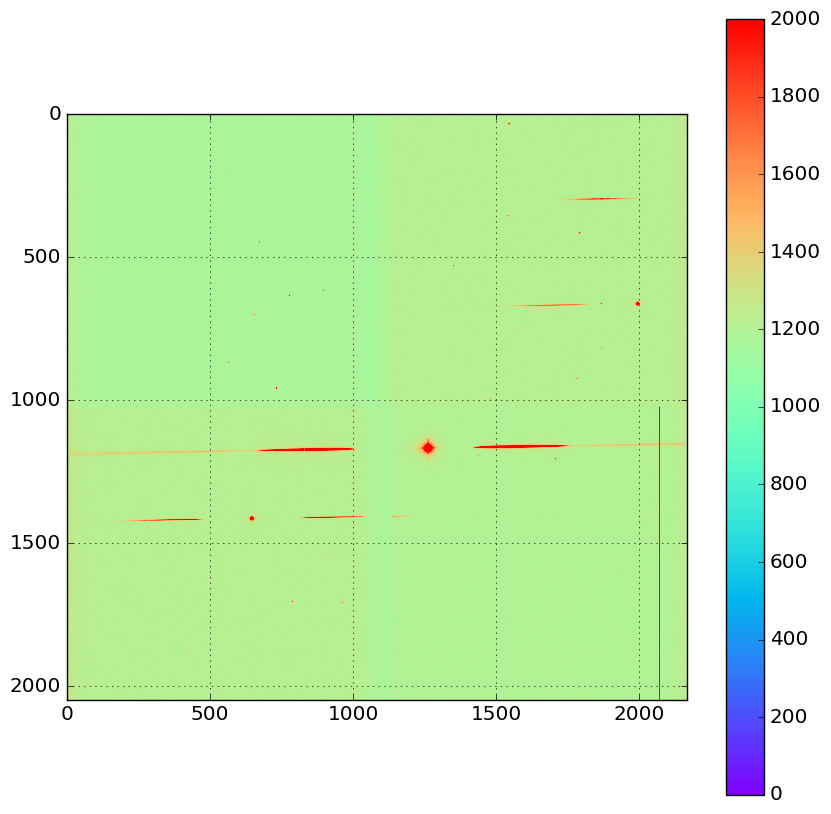

In [18]:
im=plt.imshow(image_data,cmap='rainbow',vmin=0,vmax=2000)
plt.colorbar(im)
plt.grid(True)

### Histogram of image values
================================

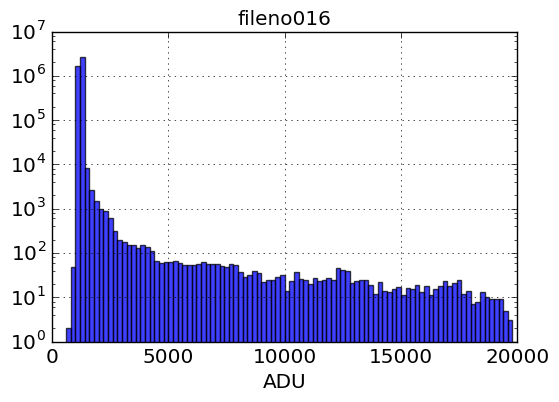

In [21]:
title=object_name
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
image_data_flat=image_data.flatten()
plt.hist(image_data_flat,bins=100,range=[0,20000],facecolor='blue', alpha=0.75);
ax.set_title(title)
ax.set_xlabel('ADU')
ax.grid(True)
plt.yscale('log')
plt.show()